In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df["Category"] = df["Category"].apply(lambda x: 1 if x == "spam" else 0)
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df["Category"].value_counts() / df.shape[0]

Category
0    0.865937
1    0.134063
Name: count, dtype: float64

In [6]:
X = df["Message"]
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9856502242152466


In [9]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print(log_model.score(X_test, y_test))

0.9766816143497757


In [12]:
# f1 scores
from sklearn.metrics import f1_score
print(f1_score(y_test, model.predict(X_test)))
print(f1_score(y_test, log_model.predict(X_test)))

0.9452054794520549
0.907142857142857


In [13]:
#  confusion matrices for both models
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, log_model.predict(X_test)))

[[961   4]
 [ 12 138]]
[[962   3]
 [ 23 127]]


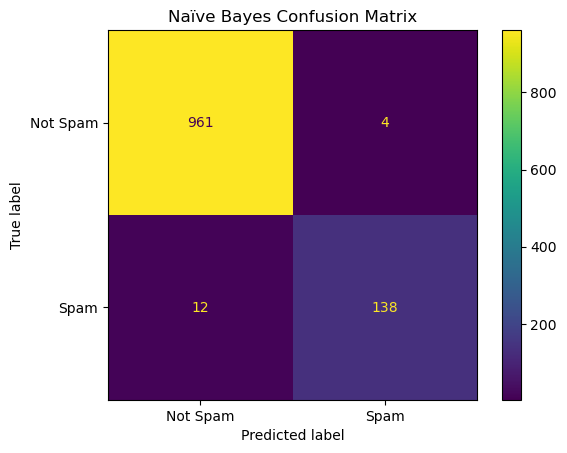

In [19]:
çm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=çm, display_labels=["Not Spam", "Spam"])
disp.plot()
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

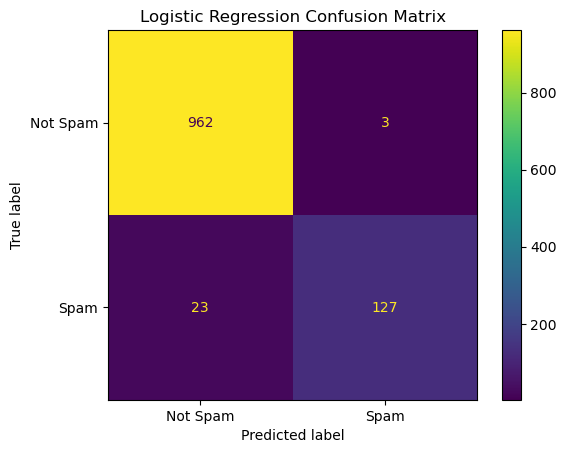

In [20]:
cm = confusion_matrix(y_test, log_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Spam", "Spam"])
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Text(0, 0.5, 'True')

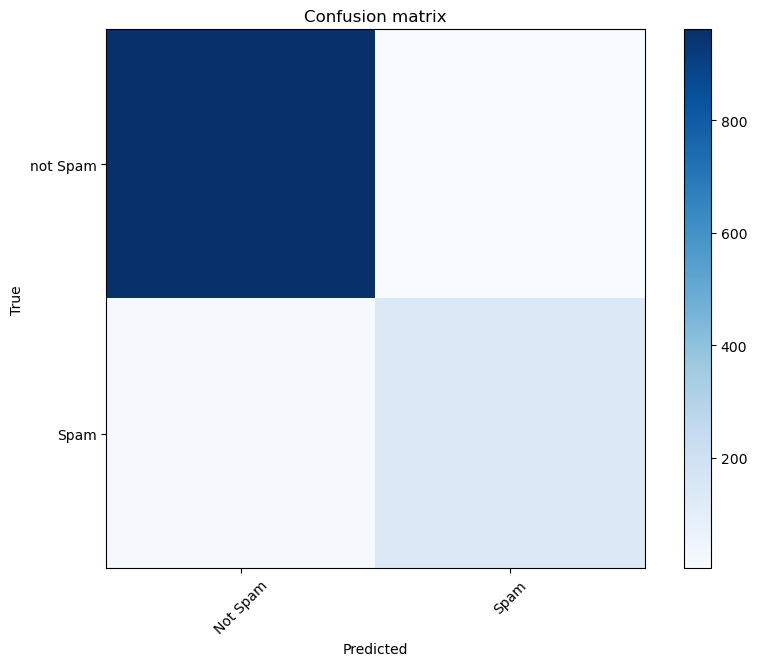

In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Not Spam", "Spam"], rotation=45)
plt.yticks(tick_marks, ["Not Spam", "Spam"])
plt.xlabel('Predicted')
plt.ylabel('True')